

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● Neighborhood’ indicates the location of the hospital.

● Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

●  Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01  4% |█▌                              | 481kB 21.8MB/s eta 0:00:01    13% |████▎                           | 1.4MB 22.1MB/s eta 0:00:01    34% |███████████                     | 3.6MB 23.1MB/s eta 0:00:01    54% |█████████████████▌              | 5.7MB 21.3MB/s eta 0:00:01    96% |██████████████████████████████▉ | 10.1MB 24.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01  7% |██▌                             | 1.0MB 23.8MB/s eta 0:00:01    33% |██████████▉                     | 4.5MB 23.6MB/s eta 0:00:01    41% |█████████████▍                  | 5.6MB 18.1MB/s eta 0:00:01    49% |███████████████▊                | 6.6MB 19.7MB/s eta 0:00:01    64% |████████████████████▊           | 8.7MB 19.2MB/s eta 0:00:01    72% |███████████████████████▎        | 9.7MB 20.0MB/s eta 0:00:01    80% |█████████████████████████▉      | 10.8MB 22.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorfl

<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 




# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

In [105]:
# load the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [106]:
# number of sampels and columns
df.shape

(110527, 14)

In [107]:
#summary for the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37

max age is 115

min age is -1 (this value does not make sense and need to be droped )

In [108]:
# cheking for missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there are no missing values 

scheduleday, appointmentdat type could be fixed but we will drop them so no need for  this step


In [109]:
#total no. of duplicated rows
df.duplicated().sum()

0

In [110]:
# check no. of unique values 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Cleaning data 

In [111]:
# droping un wanted value of age
df.drop(df.query("Age == -1").index, inplace=True)

In [112]:
#checking age
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Done

In [113]:
#droping irrelevant columns with our investigation
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
#fixing column name 
df.rename(columns={'Hipertension':'Hypertension'}, inplace = True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [115]:
#renaming'no-show' column 
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis





## Exploring the whole data frame

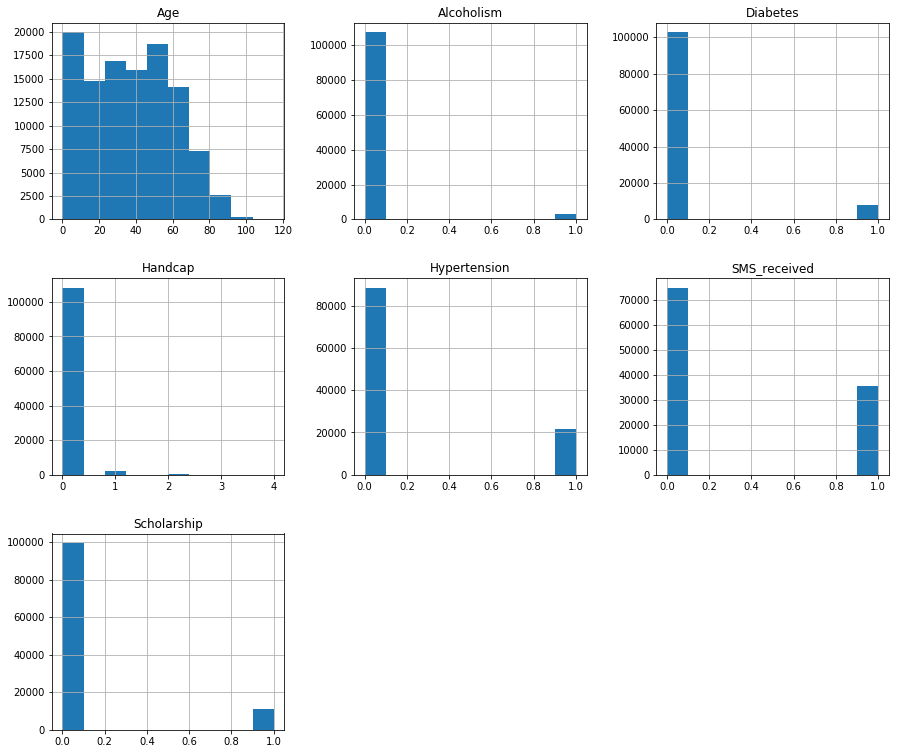

In [116]:
# histogram of the data 
df.hist(figsize = (15,13));

most of patients are not alcoholics

most of patients did not have diabetes but more than alcoholics

most of patients are not handicaped

most of patients did not have hypertenstion

number of patients who received an sms are almost half the number of patients who did not receive an sms !!



In [117]:
# spliting  patients whether they show or not show 
show = df.No_show == 'No'
noshow =df.No_show =='Yes'
df[show].count(), df[noshow].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handcap          88207
 SMS_received     88207
 No_show          88207
 dtype: int64, Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handcap          22319
 SMS_received     22319
 No_show          22319
 dtype: int64)

NO.of those who showed up are almost 4 times those who did not show at all  

## Factors that could help us predict attendance

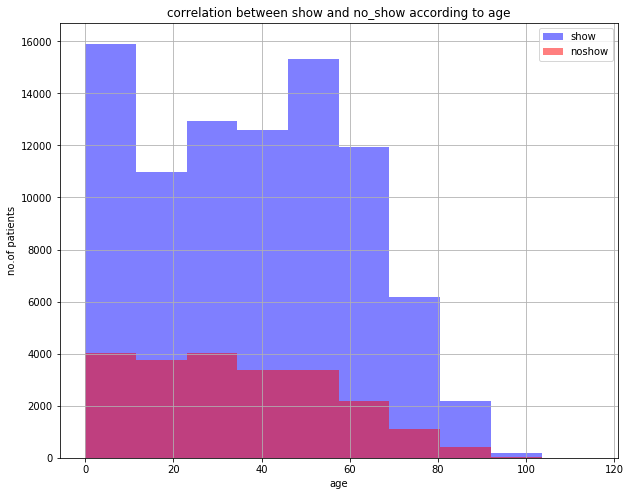

In [118]:
# correlation between "Age" and attendance
df.Age[show].hist(alpha=.5, label='show', color= 'blue',figsize=(10,8))
df.Age[noshow].hist(alpha=.5, label='noshow', color= 'red')
plt.legend();
plt.title('correlation between show and no_show according to age')
plt.xlabel('age')
plt.ylabel('no.of patients');

● patients between age 0:10 showed more than patients from 40:55 

● patients above 65 got the least attendance

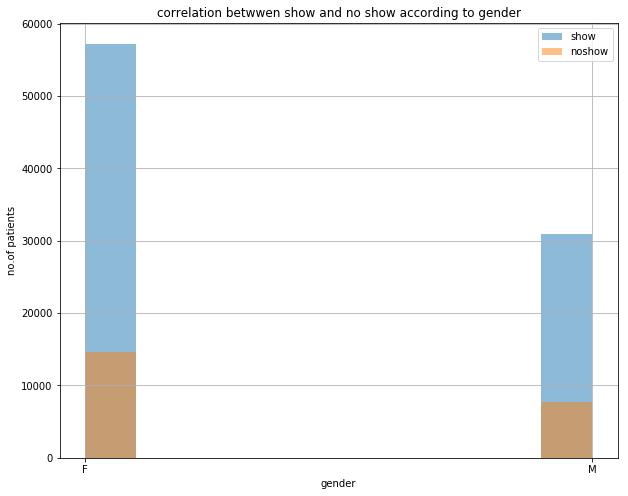

In [119]:
# does gender affects attendance 
df.Gender[show].hist(alpha=.5, label='show',figsize=(10,8))
df.Gender[noshow].hist(alpha=.5, label='noshow')
plt.legend();
plt.title('correlation betwwen show and no show according to gender')
plt.xlabel('gender')
plt.ylabel('no.of patients');


In [120]:
#correlation between attendance and  gender by numaric values
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())


F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


57245 female attendance and 14594 female absence

30962 male attendance and 7725 male absence

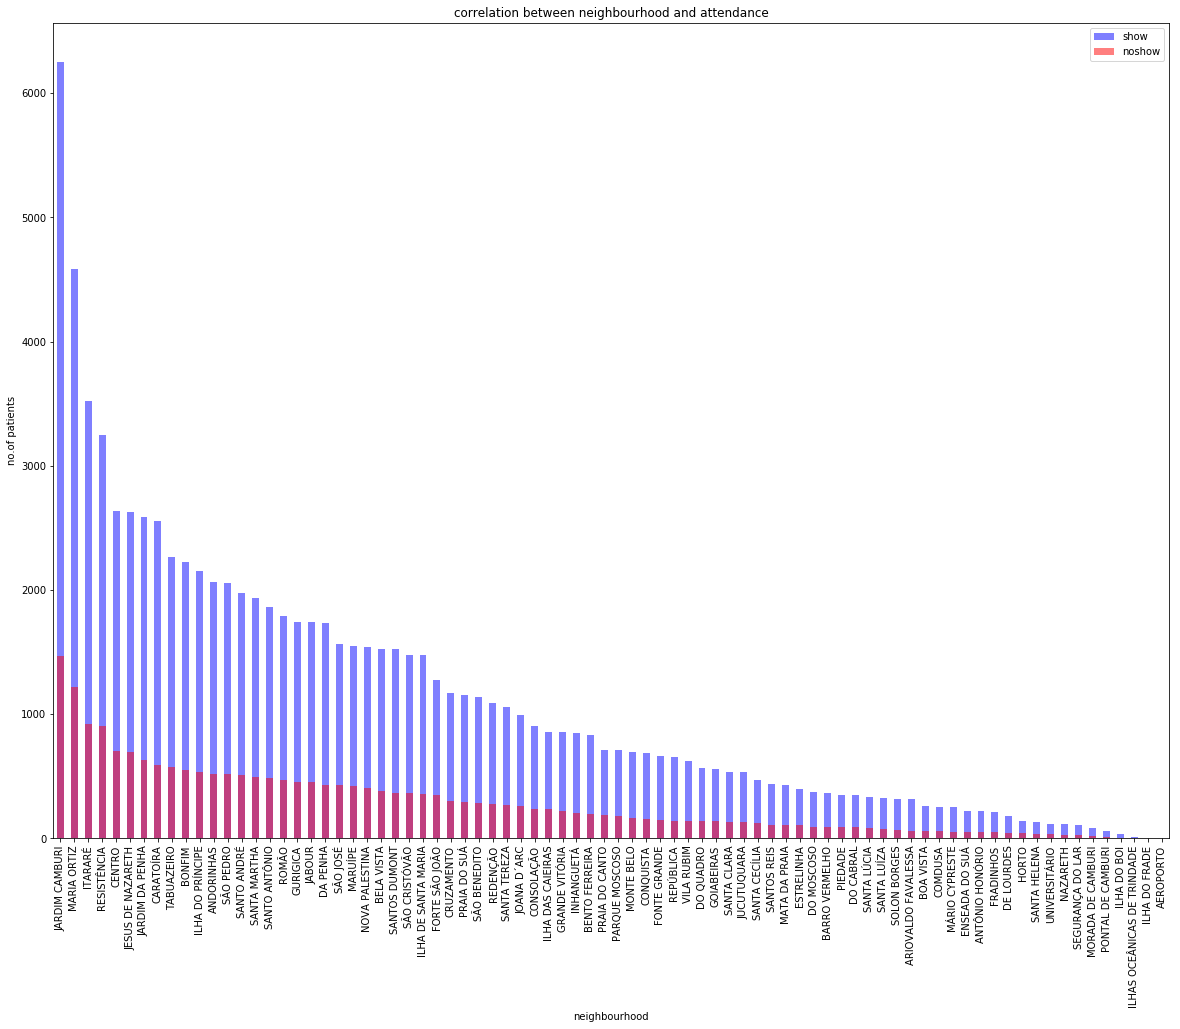

In [121]:
# compare between neighborhood and attendance
df.Neighbourhood[show].value_counts().plot(kind = 'bar',figsize=(20,15), alpha= .5, color= 'blue', label='show');
df.Neighbourhood[noshow].value_counts().plot(kind = 'bar',figsize=(20,15), alpha= .5, color= 'red', label='noshow');
plt.legend()
plt.title('correlation between neighbourhood and attendance')
plt.xlabel('neighbourhood')
plt.ylabel('no.of patients');

neighbourhood affects attendance

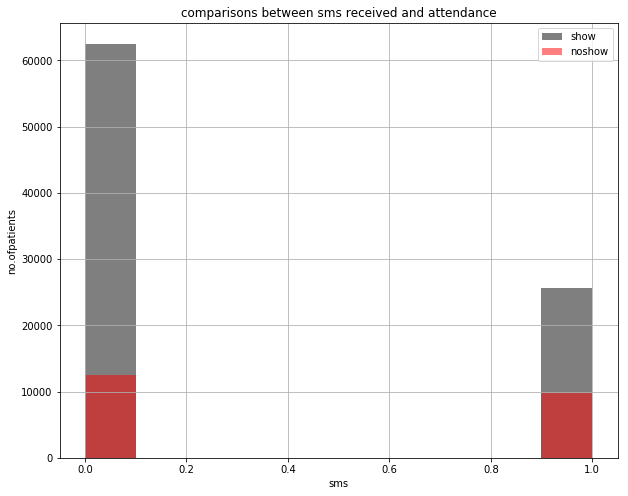

In [122]:
df.SMS_received[show].hist(alpha=.5, label='show', figsize=(10,8), color='black')
df.SMS_received[noshow].hist(alpha=.5, label='noshow', figsize=(10,8), color='red')
plt.legend()
plt.title('comparisons between sms received and attendance')
plt.xlabel('sms')
plt.ylabel('no.ofpatients');

most patient who showed did not receive an sms 

### does deseases affects attendance?


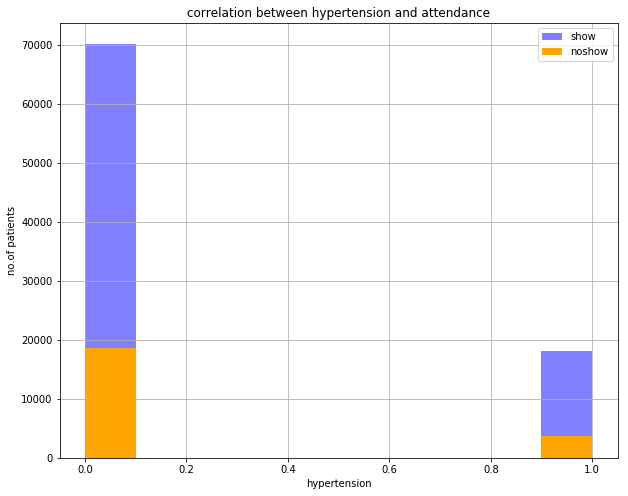

In [123]:
# does hypertension  affects attendance?
df.Hypertension[show].hist(alpha=.5, color='blue', label= 'show',figsize=(10,8))
df.Hypertension[noshow].hist(color='orange', label= 'noshow')
plt.legend()
plt.title('correlation between hypertension and attendance')
plt.xlabel('hypertension')
plt.ylabel('no.of patients');

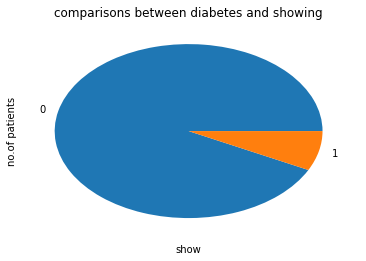

In [124]:
df.Diabetes[show].value_counts().plot(kind='pie', label='show');
plt.legend
plt.title('comparisons between diabetes and showing')
plt.xlabel('show')
plt.ylabel('no.of patients');

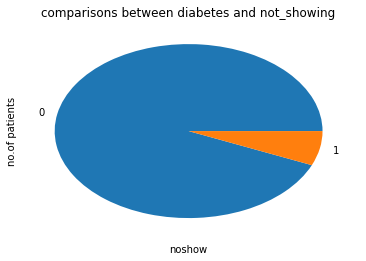

In [125]:
df.Diabetes[noshow].value_counts().plot(kind='pie', label='noshow');

plt.legend
plt.title('comparisons between diabetes and not_showing')
plt.xlabel('noshow')
plt.ylabel('no.of patients');

diabetes has no clear  effect on attendance

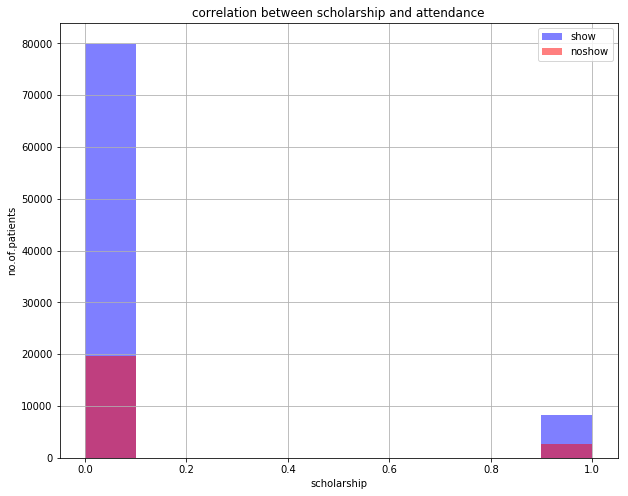

In [126]:
#does being enrolled in a scholarship affects attendance?
def attendance (df,var_1 ,var_2,var_3 ):
    df[var_1][var_2].hist(alpha=.5, color='blue', label='show',figsize=(10,8))
    df[var_1][var_3].hist(alpha=.5, color='red', label='noshow', figsize=(10,8))
    plt.legend()
    plt.title('correlation between scholarship and attendance')
    plt.xlabel('scholarship')
    plt.ylabel('no.of.patients');
attendance(df,'Scholarship',show, noshow)    



most of people who showed did not have a scholarship 

we can't say that scholarship has an effect on attendance

In [127]:
#does having hypertension and diabetes and age affects attendance?
print(df[show].groupby(['Hypertension', 'Diabetes'])['Age'].mean())
print(df[noshow].groupby(['Hypertension', 'Diabetes'])['Age'].mean())


Hypertension  Diabetes
0             0           31.510433
              1           53.666952
1             0           59.702144
              1           63.406361
Name: Age, dtype: float64
Hypertension  Diabetes
0             0           28.834155
              1           49.183391
1             0           58.377043
              1           62.820333
Name: Age, dtype: float64


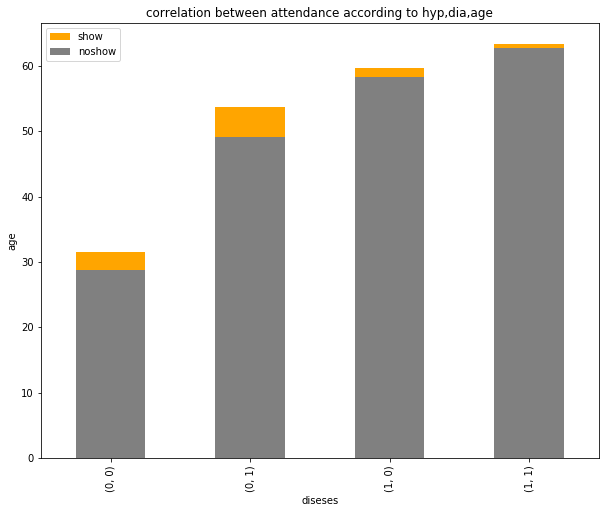

In [128]:
#lets see that with plot:
df[show].groupby(['Hypertension', 'Diabetes'])['Age'].mean().plot( kind='bar'  , color='orange', label='show',figsize=(10,8))
df[noshow].groupby(['Hypertension', 'Diabetes'])['Age'].mean().plot( kind='bar', color='grey', label='noshow',figsize=(10,8))
plt.legend()
plt.title('correlation between attendance according to hyp,dia,age')
plt.xlabel('diseses')
plt.ylabel('age');
  






 mean age for people who showed with no diseseis 31
 
 mean age for people who did not showed with no diseseis 29
 
 mean age for people who suffer form both diseses and showed is 63 and those who didn't show is 62
 there is no correlation between both diseses and age nor attendance 
  




'<a id='conclusions'></a>
## Conclusions
Age has a distinguished effect on attendance, we see that patients from 0 to 8 are most showing
and patients above 65 got the weakest attendance

neighbourhood has a strong impact on attendance this could be from any reason maybe distance on of them

no.of patients who showed without receiving an sms is much higher than no.of patients who showed and receied an sms

## limitations

obviously there is no clear correlation between attendance and ( gender, hypertension,diabites ,scholarship member or being handicaped)








 





In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0